In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [63]:
df=pd.read_csv('KepRiau 2015 - 2022.csv')
df

,datetime,total_visitor,total_accomodation
0,1/1/2014,164430,10055
1,2/1/2014,137055,10079
2,3/1/2014,167030,10132
3,4/1/2014,151982,10190
4,5/1/2014,154299,10274
...,...,...,...
103,8/1/2022,79470,15449
104,9/1/2022,104652,15502
105,10/1/2022,106160,15525
106,11/1/2022,103940,15612


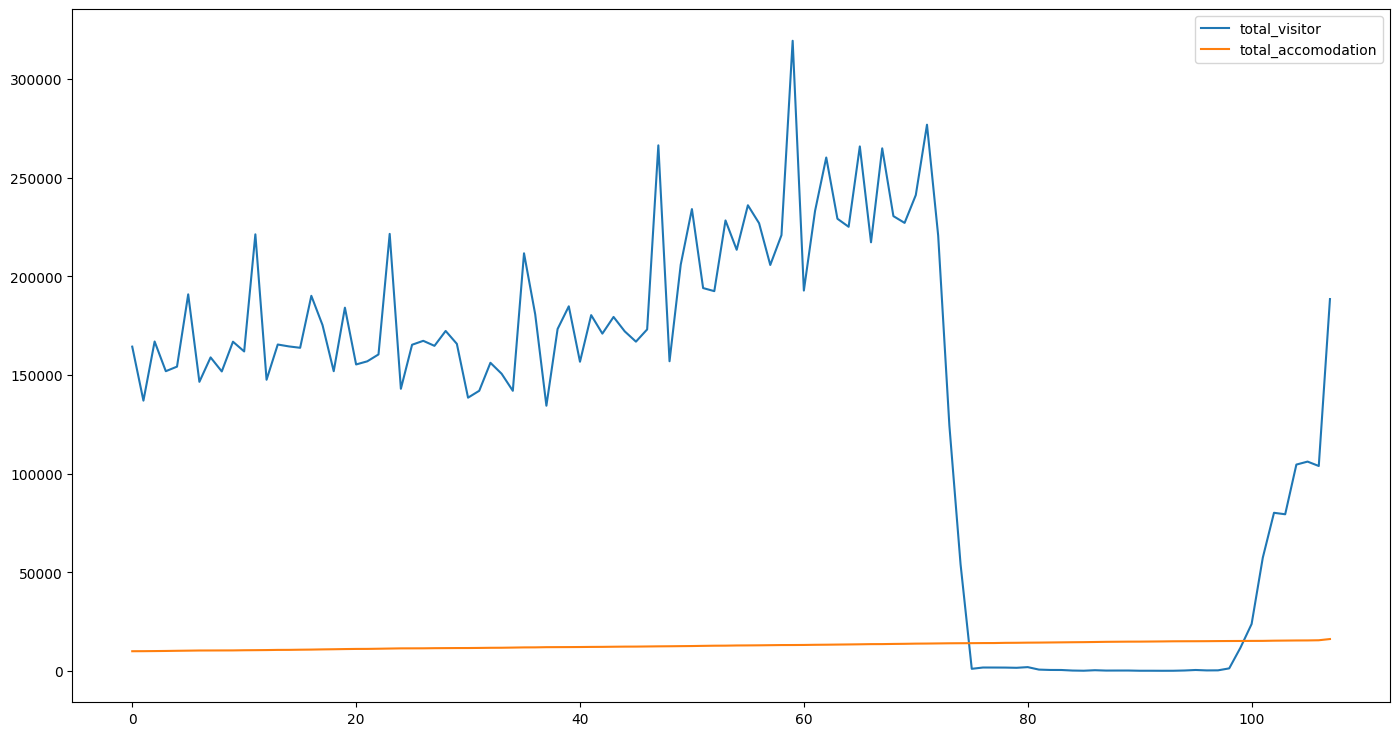

In [64]:
df.plot(figsize=(17, 9),legend=True)
plt.show()

In [65]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

In [66]:
data = df[['total_accomodation', 'total_visitor']].values

In [5]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
# Create sequences for time series forecasting
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

TEST SIZE 80:20

In [94]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [96]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/100
3/3 [==============================] - 3s 347ms/step - loss: 0.2736 - val_loss: 0.1785
Epoch 2/100
3/3 [==============================] - 0s 92ms/step - loss: 0.2488 - val_loss: 0.1637
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.2263 - val_loss: 0.1514
Epoch 4/100
3/3 [==============================] - 0s 44ms/step - loss: 0.2083 - val_loss: 0.1416
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 0.1926 - val_loss: 0.1341
Epoch 6/100
3/3 [==============================] - 0s 50ms/step - loss: 0.1775 - val_loss: 0.1286
Epoch 7/100
3/3 [==============================] - 0s 46ms/step - loss: 0.1658 - val_loss: 0.1243
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1567 - val_loss: 0.1215
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1467 - val_loss: 0.1210
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1398 - val_loss: 0.1228
Epoch 11/100
3/3 [

In [50]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.011842804029583931


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

1/1 [==============================] - 0s 54ms/step
r2: 0.8369448535565991


In [56]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

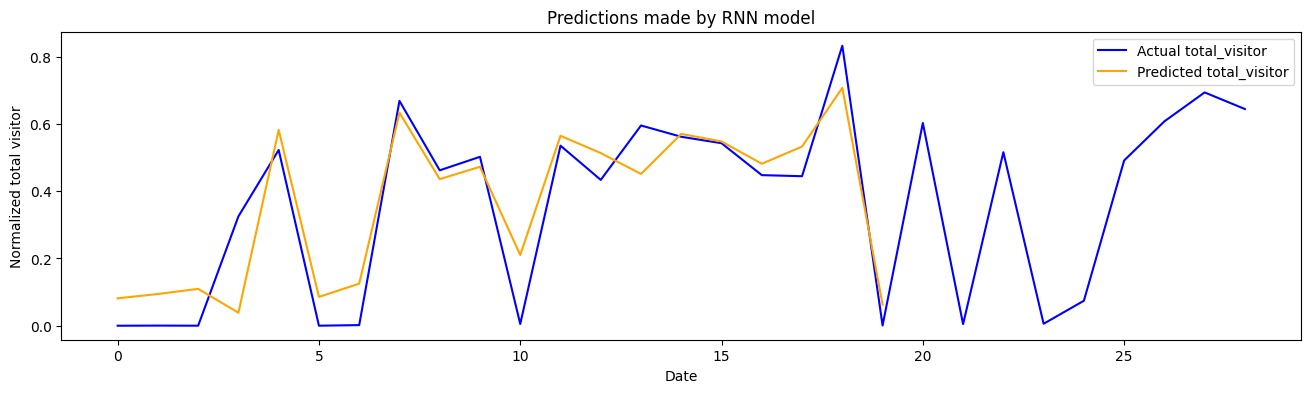

In [64]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")

TEST SIZE 70:30

In [6]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [8]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100

3/3 [==============================] - 3s 260ms/step - loss: 0.2465 - val_loss: 0.1737
Epoch 2/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2220 - val_loss: 0.1600
Epoch 3/100
3/3 [==============================] - 0s 45ms/step - loss: 0.2009 - val_loss: 0.1500
Epoch 4/100
3/3 [==============================] - 0s 50ms/step - loss: 0.1837 - val_loss: 0.1430
Epoch 5/100
3/3 [==============================] - 0s 57ms/step - loss: 0.1714 - val_loss: 0.1392
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 0.1615 - val_loss: 0.1378
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1543 - val_loss: 0.1376
Epoch 8/100
3/3 [==============================] - 0s 44ms/step - loss: 0.1499 - val_loss: 0.1384
Epoch 9/100
3/3 [==============================] - 0s 42ms/step - loss: 0.1464 - val_loss: 0.1398
Epoch 10/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1442 - val_loss: 0.1418
Epoch 11/100
3/3 

In [9]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.014919579960405827


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

1/1 [==============================] - 0s 484ms/step
r2: 0.7982301750716467


In [12]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

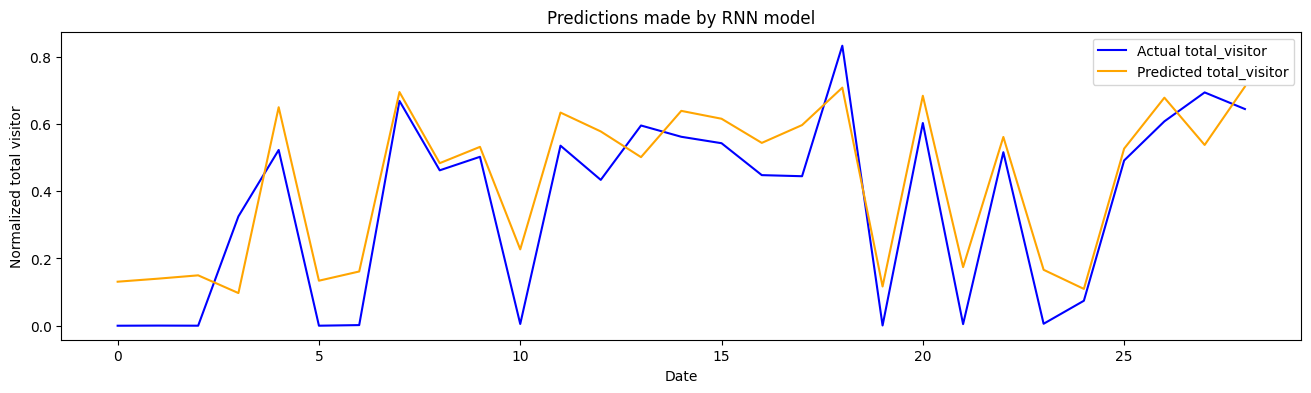

In [13]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")

1/1 [==============================] - 0s 40ms/step


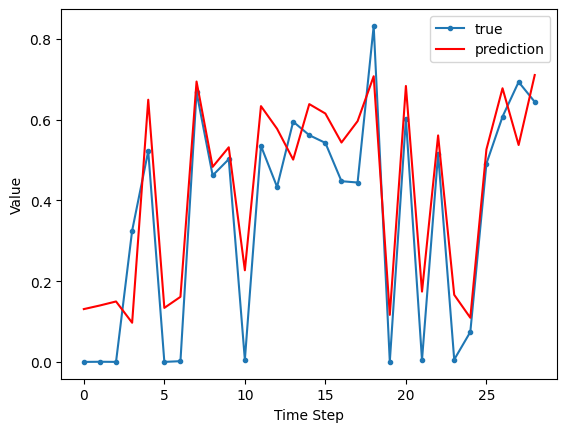

In [14]:
y_pred = model.predict(X_test)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()


TEST SIZE 60:40

In [101]:
# Choose the number of time steps
n_steps = 12

# Create sequences
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [102]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [103]:
# Reshape the data for input to the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
2/2 [==============================] - 3s 778ms/step - loss: 0.2656 - val_loss: 0.2606
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 0.2451 - val_loss: 0.2435
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.2260 - val_loss: 0.2282
Epoch 4/100
2/2 [==============================] - 0s 50ms/step - loss: 0.2097 - val_loss: 0.2150
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 0.1952 - val_loss: 0.2036
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 0.1819 - val_loss: 0.1941
Epoch 7/100
2/2 [==============================] - 0s 75ms/step - loss: 0.1722 - val_loss: 0.1859
Epoch 8/100
2/2 [==============================] - 0s 97ms/step - loss: 0.1628 - val_loss: 0.1783
Epoch 9/100
2/2 [==============================] - 0s 66ms/step - loss: 0.1552 - val_loss: 0.1713
Epoch 10/100
2/2 [==============================] - 0s 86ms/step - loss: 0.1480 - val_loss: 0.1651
Epoch 11/100
2/2 [

In [104]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')

Mean Squared Error on Test Data: 0.018665943294763565


In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10400     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
prediction=model.predict(X_test)
score=r2_score(y_test, prediction)
print("r2:",score)

2/2 [==============================] - 0s 0s/step
r2: 0.7908992167994537


In [107]:
def plotting_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(16, 4))
    plt.plot(y_test, color='blue', label='Actual total_visitor')
    plt.plot(y_pred, color='orange',
    label='Predicted total_visitor')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Normalized total visitor')
    plt.legend()
    plt.show()

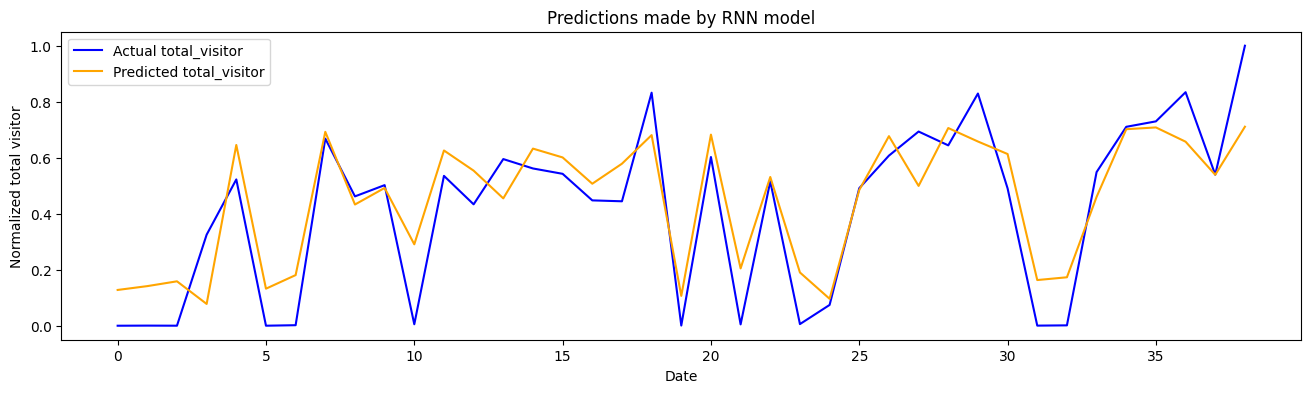

In [108]:
plotting_actual_vs_pred(y_test, prediction, "Predictions made by RNN model")